# Analysis pipeline for Gating Task

## Preliminaries

In [30]:
%cd ~/code/textrec/

/Users/kcarnold/code/textrec


In [31]:
import datetime
import json
import pathlib

import pandas as pd
import numpy as np
import toolz
from IPython.display import Image, HTML

In [83]:
from textrec.paths import paths
from textrec import analysis_util, util, notebook_util, automated_analyses
reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)

Loading COCO captions
Loading COCO id2url
Done
Loading SpaCy...done


(<module 'textrec.analysis_util' from '/Users/kcarnold/code/textrec/src/textrec/analysis_util.py'>,
 <module 'textrec.util' from '/Users/kcarnold/code/textrec/src/textrec/util.py'>,
 <module 'textrec.notebook_util' from '/Users/kcarnold/code/textrec/src/textrec/notebook_util.py'>,
 <module 'textrec.automated_analyses' from '/Users/kcarnold/code/textrec/src/textrec/automated_analyses.py'>)

In [33]:
from textrec.notebook_util import images, id2img, id2url, show_images

In [34]:
# HTML(show_images([images_by_split['val'][0]['cocoid']]))

In [35]:
%matplotlib inline

## Load results of writing experiment

In [200]:
%run -m textrec.batch_analysis

In [157]:
participants = get_participants_by_batch()
participants.keys()

dict_keys(['2018-04-09', '2018-04-24', '2018-04-27', '2018-05-02-old', '2018-05-02', '2018-06-07-gcap', 'gc1'])

In [158]:
#batch = '2018-06-07-gcap'
batch = 'gc1'

In [149]:
len(participants[batch])

14

In [150]:
try:
    example_analysis = analysis_util.get_log_analysis(participants[batch][0])
except analysis_util.AnalysisException as e:
    print(e.message)


In [151]:
len([x for x in example_analysis['byExpPage']['practice-0']['displayedSuggs'] if x is not None])

51

In [152]:
example_analysis['byExpPage']['practice-0']['displayedSuggs'].index(None)

6

In [153]:
len([s['recs']['predictions'] for s in example_analysis['byExpPage']['practice-0']['displayedSuggs'] if s is not None and ''.join(' '.join(pred['words']) for pred in s['recs']['predictions']) != ''])

33

In [154]:
example_analysis['byExpPage']['practice-0']['displayedSuggs']

[{'request_id': 0,
  'sofar': '',
  'cur_word': [],
  'flags': {'threshold': -0.989417552947998},
  'context': '',
  'recs': {'predictions': [{'words': ['a'], 'meta': None},
    {'words': ['two'], 'meta': None},
    {'words': ['the'], 'meta': None}],
   'synonyms': [{'words': []},
    {'words': []},
    {'words': []},
    {'words': []},
    {'words': []},
    {'words': []},
    {'words': []},
    {'words': []},
    {'words': []},
    {'words': []}]},
  'latency': None,
  'action': {'type': 'tapKey',
   'key': 'a',
   'x': 46.435508728027344,
   'y': 402.16705322265625,
   'jsTimestamp': 1529100480395,
   'kind': 'p',
   'pyTimestamp': 1529100480.546381,
   'participant_id': 'x9m97g'}},
 {'request_id': 1,
  'sofar': '',
  'cur_word': [{'letter': 'a',
    'tap': {'x': 46.435508728027344, 'y': 402.16705322265625}}],
  'flags': {'threshold': -0.989417552947998},
  'context': 'a',
  'recs': {'predictions': [{'words': ['a'], 'meta': None},
    {'words': ['an'], 'meta': None},
    {'words': [

In [119]:
try:
    summarize(participants[batch])
except Exception as e:
    print(e.message)


x9m97g
practice-0:gated:a black cat napping on a sunny unpainted wood bench in front of a red wall 
final-0-0:gated:a wine glass filled partially is on a table with a striped cat close next to the glass. 
final-0-1:gated:there is a stand up shower stall with dirty glass and a tan towel hanging outside of it. 
final-0-2:gated:a basic public restroom with a toilet and a sink. 
final-0-3:gated:newlywed husband and wife cut their wedding cake with help of a photographer. 
practice-1:always:a man with black hair and glasses placing a large turkey into an upper oven 
final-1-0:always:six kites flying together up in the blue sky 
final-1-1:always:a train pulls into a train station in town next to a white and blue building 
final-1-2:always:a double decker bus is in the middle lane of traffic in a cityscape area 
final-1-3:always:a fit tennis player swings his racket at the tennis ball approaching him 
practice-2:norecs:a black and red vehicle with bikes on top and people standing nearby with

practice-0:always:a black cat napping on a sunny unpainted wood bench in front of a red wall 
final-0-0:always:a yellowy brown cat is looking up at something while there is a glass of wine right in front of it
final-0-1:always:a smudged glass shower curtain with a red and blue objecys on the wall behind it and green jar on a shelf
final-0-2:always:a bathroom with a sink and an image of a toilet in the mirror
final-0-3:always:a man and a woman in a wedding dress and a photographer helping them cut cake
practice-1:norecs:a man with black hair and glasses placing a large turkey into an upper oven
final-1-0:norecs:colorful kites flying in the sky
final-1-1:norecs:a sky blue trimmed building with a train passing in front of it
final-1-2:norecs:a street in london with a red two story bus approaching
final-1-3:norecs:roger federer playing a backhand stroke in the toronto open
practice-2:gated:a black and red vehicle with bikes on top and people standing nearby with umbrellas. 
final-2-0:gated

practice-0:always:a black cat napping on a sunny unpainted wood bench in front of a red wall 
final-0-0:always:a cat sitting on top of a table in front of a glass of wine looking at its owner
final-0-1:always:a dirty bathroom with a towel hanging on a rack
final-0-2:always:a public restroom with a roll of toilet paper sitting on the tank 
final-0-3:always:a newly married couple and a photographer cutting a wedding cake 
practice-1:norecs:a man with black hair and glasses placing a large turkey into an upper oven
final-1-0:norecs:children flying colorful kites on a beach
final-1-1:norecs:a train arriving at a rural train station
final-1-2:norecs:a bright red double decker bus going down a busy street
final-1-3:norecs:a man dashing to intercept a temnis ball with his racket
practice-2:gated:a black and red vehicle with bikes on top and people standing nearby with umbrellas. 
final-2-0:gated:a man riding a small wave on his surfboard 
final-2-1:gated:a college student's dorm with a macboo

In [201]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('error')
    analyses = analyze_all(participants[batch], traits='NFC Extraversion Openness Trust')

________________________________________________________________________________
[Memory] Calling textrec.analysis_util.get_log_analysis_raw...
get_log_analysis_raw('/Users/kcarnold/code/textrec/logs/x9m97g.jsonl', 1417909, git_rev='f57aaec', analysis_files={ 'analyze.js': 'f24414e722aeef392360f4da123b36705f6895e0',
  'run-analysis': '11083c5f51c5c469297e930142323920f09fe548',
  'src/Analyzer.js': 'b957efb0450f5d1abb8092b9bc7072b075371d69'})
_____________________________________________get_log_analysis_raw - 4.0s, 0.1min
________________________________________________________________________________
[Memory] Calling textrec.analysis_util.get_log_analysis_raw...
get_log_analysis_raw('/Users/kcarnold/code/textrec/logs/h6c27m.jsonl', 1167057, git_rev='f57aaec', analysis_files={ 'analyze.js': 'f24414e722aeef392360f4da123b36705f6895e0',
  'run-analysis': '11083c5f51c5c469297e930142323920f09fe548',
  'src/Analyzer.js': 'b957efb0450f5d1abb8092b9bc7072b075371d69'})
___________________________

In [202]:
globals().update(analyses)

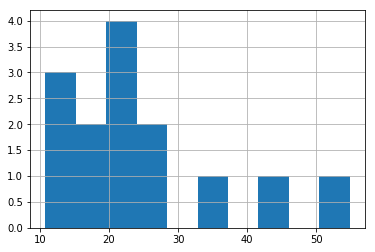

In [161]:
experiment_level.total_time.hist()

In [123]:
experiment_level.total_time.describe()

count    14.000000
mean     24.820038
std      12.615856
min      10.782083
25%      18.084625
50%      21.704983
75%      26.767933
max      54.890783
Name: total_time, dtype: float64

In [124]:
(trial_level.seconds_spent_typing).describe()

count    168.000000
mean      48.721607
std       71.013407
min        8.212000
25%       24.103250
50%       36.644000
75%       52.098250
max      838.989000
Name: seconds_spent_typing, dtype: float64

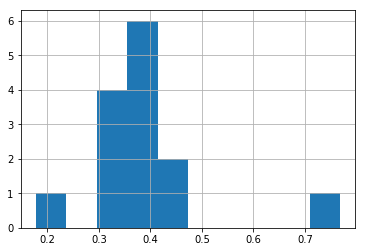

In [125]:
# Fraction of time spent actually typing
((trial_level.groupby('participant').seconds_spent_typing.sum() / 60) / trial_level.groupby('participant').total_time.mean()).hist()

In [162]:
for kind in 'experiment block trial'.split():
    analyses[f'{kind}_level'].to_csv(f'data/analyzed/{kind}_{batch}.csv')

In [163]:
import seaborn as sns

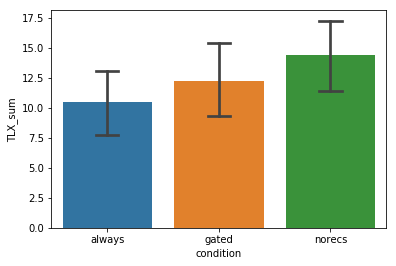

In [199]:
sns.barplot(x='condition', y='TLX_sum', data=block_level, capsize=.2)

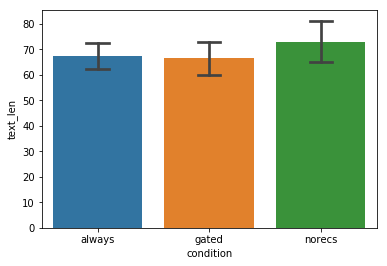

In [198]:
sns.barplot(x='condition', y='text_len', data=trial_level, capsize=.2)

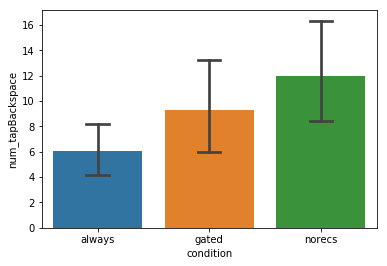

In [166]:
sns.barplot(x='condition', y='num_tapBackspace', data=trial_level, capsize=.2)

In [206]:
trial_level['num_recs_full'] = trial_level.num_recs_full_gated + trial_level.num_recs_full_seen
trial_level['gating_frac'] = trial_level['num_recs_full_gated'] / trial_level['num_recs_full']

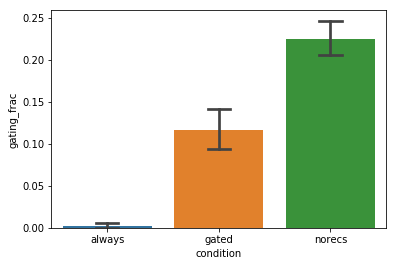

In [207]:
sns.barplot(x='condition', y='gating_frac', data=trial_level, capsize=.2)

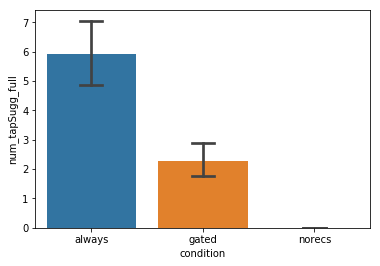

In [203]:
sns.barplot(x='condition', y='num_tapSugg_full', data=trial_level, capsize=.2)

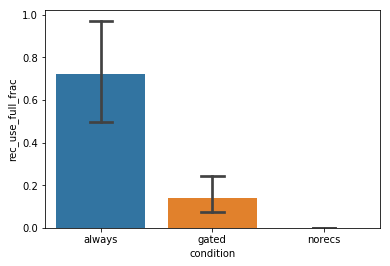

In [204]:
sns.barplot(x='condition', y='rec_use_full_frac', data=trial_level, capsize=.2)

In [26]:
# summarize('2018-05-02')

In [177]:
len(trial_level.text), len(set(trial_level.participant))

(168, 14)

In [175]:
len(trial_level), len(block_level)

(168, 42)

In [178]:
helpful_ranks_by_condition

name,accurate-least-condition,accurate-most-condition,quick-least-condition,quick-most-condition,specific-least-condition,specific-most-condition
always,0,11,0,12,0,11
gated,2,3,2,2,0,3
norecs,12,0,12,0,14,0


In [133]:
helpful_ranks_by_idx

name,accurate-least-idx,accurate-most-idx,quick-least-idx,quick-most-idx,specific-least-idx,specific-most-idx
0,2,0,0,1,2,0
1,1,1,2,1,1,1
2,0,2,1,1,0,2


In [179]:
experiment_level['NFC'].describe()

count    14.000000
mean      0.225714
std       0.140533
min       0.010000
25%       0.145000
50%       0.230000
75%       0.332500
max       0.460000
Name: NFC, dtype: float64

In [180]:
experiment_level['Extraversion'].describe()

count    14.000000
mean     -0.097143
std       0.206041
min      -0.400000
25%      -0.260000
50%      -0.110000
75%       0.075000
max       0.220000
Name: Extraversion, dtype: float64